In [3]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [4]:
data_train = pd.read_csv("train.csv")
type(data_train)

pandas.core.frame.DataFrame

In [5]:
#info输出dataframe的基本信息
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
#describe输出dataframe的详细信息，包括均值，方差等
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#绘图了解数据
#一、了解数据的各个特征对于分类结果的影响（认识数据）
import matplotlib.pyplot as plt
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
#figure方法创建一个图形实例
fig = plt.figure()
fig.set(alpha=0.2)

#Survived
plt.subplot2grid((2, 3), (0, 0))
data_train.Survived.value_counts().plot(kind='bar')
plt.title(u"获救情况（1表示获救）")
plt.ylabel(u"人数")

#Pclass
plt.subplot2grid((2, 3), (0, 1))
data_train.Pclass.value_counts().plot(kind='bar')
plt.title(u"乘客等级分布")
plt.ylabel(u"人数")

#Age
plt.subplot2grid((2, 3), (0, 2))
plt.scatter(data_train.Survived, data_train.Age)
plt.grid(b=True, which='major', axis='y')
plt.title(u"获救人年龄分布")
plt.ylabel(u"年龄")

#colspan声明占据几个子图的位置
#Age and Pclass
plt.subplot2grid((2, 3), (1, 0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde')
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.title(u"各等级的乘客年龄分布")
plt.xlabel(u"年龄")
plt.ylabel(u"密度")
plt.legend((u"头等舱", u"二等舱", u"三等舱"), loc='best')

#Emabarked
plt.subplot2grid((2, 3), (1, 2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"各港口上船人数")
plt.ylabel(u"人数")

#设置子图间距
plt.tight_layout()
plt.show()

type(data_train)

<Figure size 640x480 with 5 Axes>

pandas.core.frame.DataFrame

<Figure size 432x288 with 0 Axes>

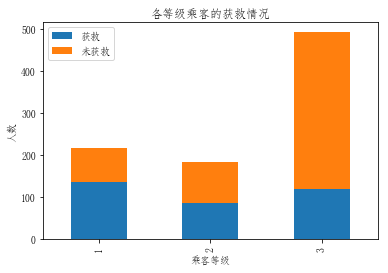

pandas.core.frame.DataFrame

In [8]:
#不同等级的舱位对于获救概率的影响
fig = plt.figure()
fig.set(alpha=0.2)

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df = DataFrame({u"获救":Survived_1, u"未获救":Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各等级乘客的获救情况")
plt.xlabel(u"乘客等级")
plt.ylabel(u"人数")
plt.show()

type(data_train)

<Figure size 432x288 with 0 Axes>

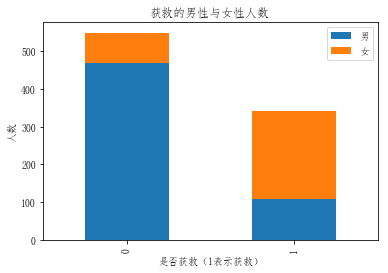

pandas.core.frame.DataFrame

In [9]:
#性别对于获救情况的影响
fig = plt.figure()
fig.set(alpha=0.2)

Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df = DataFrame({u"男": Survived_m, u"女" : Survived_f})
df.plot(kind='bar', stacked=True)
plt.title(u"获救的男性与女性人数")
plt.xlabel(u"是否获救（1表示获救）")
plt.ylabel(u"人数")
plt.show()

type(data_train)

pandas.core.frame.DataFrame

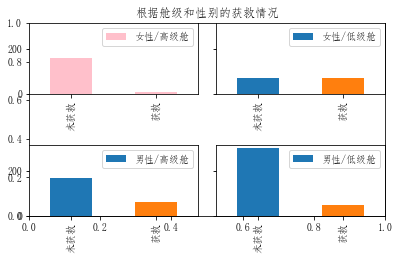

In [10]:
#高级舱和低级舱男性和女性的获救情况
fig = plt.figure()
fig.set(alpha=0.2)
plt.title(u"根据舱级和性别的获救情况")

ax1 = fig.add_subplot(221)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().plot(kind='bar', label='female high class', color='pink')
ax1.set_xticklabels([u"未获救", u"获救"])
ax1.legend([u"女性/高级舱"], loc='best')

ax1 = fig.add_subplot(222, sharey=ax1)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind='bar')
ax1.set_xticklabels([u"未获救", u"获救"])
ax1.legend([u"女性/低级舱"], loc='best')

ax1 = fig.add_subplot(223, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().plot(kind='bar')
ax1.set_xticklabels([u"未获救", u"获救"])
ax1.legend([u"男性/高级舱"], loc='best')

ax1 = fig.add_subplot(224, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind='bar')
ax1.set_xticklabels([u"未获救", u"获救"])
ax1.legend([u"男性/低级舱"], loc='best')

plt.tight_layout()

type(data_train)

pandas.core.frame.DataFrame

<Figure size 432x288 with 0 Axes>

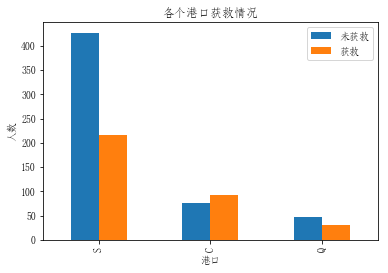

In [11]:
#各港口上船的获救情况
# fig = plt.figure()
# fig.set(alpha=0.2)

# Survived_S = data_train.Survived[data_train.Embarked == 'S'].value_counts()
# Survived_C = data_train.Survived[data_train.Embarked == 'C'].value_counts()
# Survived_Q = data_train.Survived[data_train.Embarked == 'Q'].value_counts()

# df = DataFrame({u"S" : Survived_S, u"C" : Survived_C, u"Q" : Survived_Q})
# df.plot(kind='bar')
# plt.title(u"各个港口获救情况")
# plt.xlabel(u"是否获救")
# plt.ylabel(u"人数")

fig = plt.figure()
fig.set(alpha=0.2)

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df = DataFrame({u"未获救" : Survived_0, u"获救" : Survived_1})
df.plot(kind='bar')
plt.title(u"各个港口获救情况")
plt.xlabel(u"港口")
plt.ylabel(u"人数")

type(data_train)

In [12]:
#二、数据预处理
#1、数据中特殊点的处理
#2、特征工程
#1、缺失值的处理:Age和Cabin
#Age的拟合
from sklearn.ensemble import RandomForestRegressor

#拟合年龄
def set_missing_ages(df):
    
    #利用四个特征值拟合Age
    age_df = df[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']]
    
    #分离已知年龄和未知年龄的数据
    known_age = age_df[age_df.Age.notnull()].values
    unknown_age = age_df[age_df.Age.isnull()].values
    
    #利用随机森林拟合已知年龄数据
    y = known_age[:, 0]
    X = known_age[:, 1:]
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    
    print(known_age[:, 1:])
    
    
    #预测
    Pre_ages = rfr.predict(unknown_age[:, 1::])
    
    df.loc[(df.Age.isnull()), 'Age'] = Pre_ages
    
    return df, rfr

#处理Cabin
def set_Cabin_type(df):
    
    df.loc[(df.Cabin.notnull()), 'Cabin'] = 'Yes' 
    df.loc[(df.Cabin.isnull()), 'Cabin'] = 'No' 

    return df

#异常数据处理完毕
data_train, rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)
type(data_train)

[[ 7.25    0.      1.      3.    ]
 [71.2833  0.      1.      1.    ]
 [ 7.925   0.      0.      3.    ]
 ...
 [30.      0.      0.      1.    ]
 [30.      0.      0.      1.    ]
 [ 7.75    0.      0.      3.    ]]


pandas.core.frame.DataFrame

In [13]:
# data_train.info
#特征因子化，将不是数值类型的数据转换成数值类型
#使用pandas.get_dummies转换成one-hot编码
type(data_train)
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix='Cabin')
dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix='Embarked')
dummies_Sex = pd.get_dummies(data_train['Sex'], prefix='Sex')
dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix='Pclass')
#拼接
df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
#删除非数值特征,inplace表示在原有数据上更改还是创建新的对象
df.drop(['Cabin', 'Embarked', 'Sex', 'Pclass', 'Name', 'Ticket'], axis=1, inplace=True)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
5,6,0,23.838953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0


In [14]:
#scale Age和Fare到-1~1
from sklearn import preprocessing
import numpy as np

scaler = preprocessing.StandardScaler()
age_numpy = np.array(df['Age']).reshape(-1, 1)
#scaler参数必须是二维
age_scaler = scaler.fit(age_numpy)
df['Age_scaler'] = scaler.fit_transform(age_numpy, age_scaler)

fare_numpy = np.array(df['Fare']).reshape(-1, 1)
fare_scaler = scaler.fit(fare_numpy)
df['Fare_scaler'] = scaler.fit_transform(fare_numpy, fare_scaler)

df.drop(['Age', 'Fare'], axis=1, inplace=True)
df

,PassengerId,Survived,SibSp,Parch,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaler,Fare_scaler
0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,-0.561380,-0.502445
1,2,1,1,0,0,1,1,0,0,1,0,1,0,0,0.613171,0.786845
2,3,1,0,0,1,0,0,0,1,1,0,0,0,1,-0.267742,-0.488854
3,4,1,1,0,0,1,0,0,1,1,0,1,0,0,0.392942,0.420730
4,5,0,0,0,1,0,0,0,1,0,1,0,0,1,0.392942,-0.486337
5,6,0,0,0,1,0,0,1,0,0,1,0,0,1,-0.426384,-0.478116
6,7,0,0,0,0,1,0,0,1,0,1,1,0,0,1.787722,0.395814
7,8,0,3,1,1,0,0,0,1,0,1,0,0,1,-2.029569,-0.224083
8,9,1,0,2,1,0,0,0,1,1,0,0,0,1,-0.194333,-0.424256
9,10,1,1,0,1,0,1,0,0,1,0,0,1,0,-1.148655,-0.042956


In [15]:
#逻辑回归建模
#使用线性模型，将dataframe中的数值取出来进行建模
from sklearn import linear_model

train_df = df.filter(regex='Survived|SibSp|Parch|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*|Age_scaler|Fare_scaler')
train_np = train_df.values

y = train_np[:, 0]

X = train_np[:, 1:]

#拟合
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

In [16]:
#对于测试集做和训练集一样的预处理
data_test = pd.read_csv("test.csv")
data_test.info()
data_test.loc[(data_test.Fare.isnull()), 'Fare'] = 0
#1、随机森林拟合年龄
tmp_df = data_test[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[data_test.Age.isnull()].values
X = null_age[:, 1:]
Pred_ages = rfr.predict(X)
data_test.loc[(data_test.Age.isnull()), 'Age'] = Pred_ages
data_set = set_Cabin_type(data_test)

#2、特征因子化
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix='Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix='Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix='Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix='Pclass')
df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Name', 'Embarked', 'Sex', 'Pclass', 'Cabin', 'Ticket'], axis=1, inplace=True)
#3、缩小Age和Fare的取值范围
df_test['Age_scaled'] = scaler.fit_transform(df_test[['Age']])
df_test['Fare_scaled'] = scaler.fit_transform(df_test[['Fare']])
df_test.drop(['Age', 'Fare'], axis=1, inplace=True)
df_test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,SibSp,Parch,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,0,0,1,0,0,1,0,0,1,0,0,1,0.307521,-0.496637
1,893,1,0,1,0,0,0,1,1,0,0,0,1,1.256241,-0.511497
2,894,0,0,1,0,0,1,0,0,1,0,1,0,2.394706,-0.463335
3,895,0,0,1,0,0,0,1,0,1,0,0,1,-0.261711,-0.481704
4,896,1,1,1,0,0,0,1,1,0,0,0,1,-0.641199,-0.416740
5,897,0,0,1,0,0,0,1,0,1,0,0,1,-1.248380,-0.471623
6,898,0,0,1,0,0,1,0,1,0,0,0,1,-0.034018,-0.500221
7,899,1,1,1,0,0,0,1,0,1,0,1,0,-0.337609,-0.117238
8,900,0,0,1,0,1,0,0,1,0,0,0,1,-0.944790,-0.507390
9,901,2,0,1,0,0,0,1,0,1,0,0,1,-0.717097,-0.204154


In [17]:
#预测
test_df = df_test.filter(regex='SibSp|Parch|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*|Age_scaled|Fare_scaled')
test_np = test_df.values

pred = clf.predict(test_np)

result = pd.DataFrame({'PassengerId' : data_test['PassengerId'].values, 'Survived' : pred.astype(np.int32)})

result.to_csv("result.csv", index=False)

In [18]:
#撸完一遍baseline之后，将各个特征的权重与特征联系起来观察各个特征对于
pd.DataFrame({"columns" : list(train_df.columns)[1:], "coef" : list(clf.coef_.T)})

,columns,coef
0,SibSp,[-0.3442357371772852]
1,Parch,[-0.10491614692613807]
2,Cabin_No,[0.0]
3,Cabin_Yes,[0.9021078027089035]
4,Embarked_C,[0.0]
5,Embarked_Q,[0.0]
6,Embarked_S,[-0.41726333484904904]
7,Sex_female,[1.956571197264977]
8,Sex_male,[-0.6774207919466417]
9,Pclass_1,[0.34115965265808224]


In [19]:
train_df.columns

Index(['Survived', 'SibSp', 'Parch', 'Cabin_No', 'Cabin_Yes', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Age_scaler', 'Fare_scaler'],
      dtype='object')

In [20]:
#cross_validation
from sklearn import cross_validation

clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
all_data = df.filter(regex='Survived|SibSp|Parch|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*|Age_scaled|Fare_scaled')
#对于DataFrame中的数值类型可以通过values获取值
y = all_data.values[:, 0]
X = all_data.values[:, 1:]
print(cross_validation.cross_val_score(clf, X, y, cv=5))

[0.79888268 0.79888268 0.80337079 0.78089888 0.81920904]


D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [37]:
#bad case
#数据分割，训练数据和测试数据7:3
split_train, split_cv = cross_validation.train_test_split(df, test_size=0.3, random_state=0)
train_df = split_train.filter(regex='Survived|SibSp|Parch|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*|Age_scaled|Fare_scaled')

#生成线性模型
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
X = train_df.values[:, 1:]
y = train_df.values[:, 0]
clf.fit(X, y)

#预测
cv_df = split_cv.filter(regex='Survived|SibSp|Parch|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*|Age_scaled|Fare_scaled')
Pred = clf.predict(cv_df.values[:, 1:])

#查看预测错误的数据
origin_data_train = pd.read_csv("train.csv")
bad_case = origin_data_train.loc[origin_data_train['PassengerId'].isin(split_cv[Pred != cv_df.values[:, 0]]['PassengerId'].values)]
bad_case

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.8542,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.00,1,0,345763,18.0000,NaN,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.00,1,0,7546,9.4750,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.00,1,0,349237,17.8000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.00,0,1,113509,61.9792,B30,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.00,4,2,3101281,7.9250,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.00,3,0,3101278,15.8500,NaN,S
113,114,0,3,"Jussila, Miss. Katriina",female,20.00,1,0,4136,9.8250,NaN,S


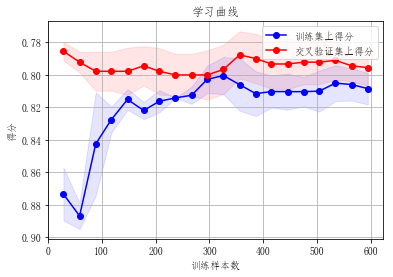

(0.8015093034017282, 0.03376943718866787)

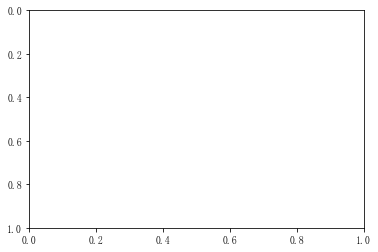

In [53]:
#绘制学习曲线
#观察你当前的模型处于什么状态
#若为过拟合，则可以进行特征选取或者增大数据量来平衡
#若为欠拟合，则可以考虑继续增加特征数量
import numpy as np
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,
                  train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()
    
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")
    
        plt.legend(loc="best")
        
        plt.draw()
        plt.show()
        plt.gca().invert_yaxis()
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff
y = all_data.values[:, 0]
X = all_data.values[:, 1:]
plot_learning_curve(clf, u"学习曲线", X, y)

In [56]:
#最后一步，模型融合，可以对于多个模型进行融合，从而缓解过拟合的问题
#对于数据来说如果产生了过拟合，那么可以将数据分成若干个subset，每次对于一个subset进行训练，如果说在subset上产生过拟合，那么对于subset进行融合则可以减轻过拟合的状况
from sklearn.ensemble import BaggingRegressor

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
train_np = train_df.values

# y即Survival结果
y = train_np[:, 0]

# X即特征属性值
X = train_np[:, 1:]

# fit到BaggingRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
bagging_clf = BaggingRegressor(clf, n_estimators=20, max_samples=0.8, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=-1)
bagging_clf.fit(X, y)

test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
predictions = bagging_clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_bagging_predictions.csv", index=False)